## <center>Disordered and complex systems</center>

# <center>Two-dimensional random walks, First passage time and the survival probability, Lévy flights.</center>

**Author:** João António - joaoantant@gmail.com \& github.com/JoaoAnt/.

**Based on:** the instructions for Project 03 from professor Alexander V. Goltsev.

**The ipybn can be found in:** the Github in the WaddlePortfolio/Projects.

# Table of Contents:

* 1.Two-dimensional random walk.
    * 1.0 Confirmation Step
        * A-Normalization
        * B-Probability times one coordinate
        * C-Probability times (x² +y²)
    * Task 1.1
    * Task 1.2
* 2.First passage time and the survival probability
    * 2.1-Plot first passage time probability vs time
    * 2.2-Compare to probability theoretical vs time
    * 2.3-Plot first passage time ln(probability) vs ln(t)
    * 2.4-Compare to ln (F theoretical) vs ln(t)
    * 2.5-Calculate the survival probability
    * 2.6-Compare to theoretical prediction of S
* 3.Lévy Flights
    * Task 3.1
    * Task 3.2
        * Analytical Proof
        * Numeric example

**Note:**
For simplicity in the notation i have used "Xbar" for the X obtained through simulation and "Xtheo" for the X theoretical, where X can be any property of the model in study, for example "Pbar" and "Ptheo".

# 1. Two-dimensional random walk.
Simulate symmetric random walks on the square lattice. Probabilities of jumps
on the left, on the right, up and down are equal, 1/4.

**Algorithm for random walks on a square lattice.**

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import erf

In [2]:
t=5001
N=t*10
Pbar = np.zeros(shape=(t*2,t*2))
Ptheo = np.zeros(shape=(t*2,t*2))

In [ ]:
for traj in range(N):
    A = [random.randint(1,4) for x in range(0,t)]
    
    EndPointX = A[:-1].count(2)-A[:-1].count(4)
    EndPointY = A[:-1].count(1)-A[:-1].count(3)
    Pbar[EndPointX+t,EndPointY+t]+=1/(2*N)
    
    EndPointX = A.count(2)-A.count(4)
    EndPointY = A.count(1)-A.count(3)
    Pbar[EndPointX+t,EndPointY+t]+=1/(2*N)

In [4]:
for x in range (-t,t):
    for y in range (-t,t):
        Ptheo[x+t,y+t]=np.exp(-((x)**2+(y)**2)/t)/(np.pi*t)

## 1.0 Confirmation Step ##

### A-Normalization ###

$\sum_{x,y}Pbar (x,y,t) =1$

In [5]:
print("The sum of Pbar is ",round(np.sum(Pbar),5))

The sum of Pbar is  1.0


### B-Probability times one coordinate ###

$\sum_{x,y}Pbar (x,y,t) x =\sum_{x,y}Pbar (x,y,t) y = 0$

In [6]:
CheckX=0
CheckY=0
for q in range (-t,t):
    CheckX+=Pbar[q+t,:]*q
    CheckY+=Pbar[:,q+t]*q
print("The sum of Pbar times x is ",round(np.sum(CheckX),5))
print("The sum of Pbar times y is ",round(np.sum(CheckY),5))

The sum of Pbar times x is  -0.01922
The sum of Pbar times y is  -0.02482


### C-Probability times (x² +y²) ###

$\sum_{x,y}Pbar (x,y,t) (x^2+y^2) =t$

In [7]:
CheckXY=0
for x in range (-t, t):
    for y in range (-t,t):
        CheckXY+=Pbar[x+t,y+t]*((x)**2+(y)**2)
print("The sum of Pbar times (x²+y²) is ",round(np.sum(CheckXY),5))

The sum of Pbar times (x²+y²) is  5005.27804


All the confirmations values of Pbar are pretty close to the values expected.

## Task 1.1

Compare between Pbar and P_Theoretical, with the former equal to:

$$P(x,y,t)=\frac{1}{\pi t}e^{-(x^2+y^2)/t}.$$

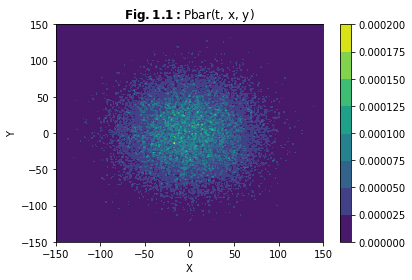

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
x=range(-t,t)
y=range(-t,t)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Pbar)
plt.title(r"$\bf{Fig.1.1:}$"+'Pbar(t, x, y)')
plt.xlim([-150,150])
plt.ylim([-150,150])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

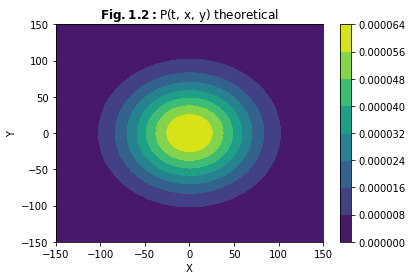

In [9]:
fig = plt.figure()
ax = plt.subplot(111)
plt.contourf(X, Y, Ptheo)
plt.title(r"$\bf{Fig.1.2:}$"+'P(t, x, y) theoretical')
plt.xlim([-150,150])
plt.ylim([-150,150])
plt.colorbar()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In Figure $\bf{Fig.1.1:}$ we can see a contourf of the Pbar, on $\bf{Fig.1.2:}$ it is plotted the countourf of the Ptheo, they have the same  shape, the values are not the same, but it's easy to perceive that if we increase the amount of particles of Pbar it will lead to the Ptheo.

The Pbar was made with 10 times t number of particles, so 50010 particles.

## Task 1.2 ##

Plot 3 trajectories after 100 jumps.

In [10]:
t2=100
z=range(100)
EndPoint = np.zeros(shape=(2,3*t2+1))

In [11]:
for jump in range(300):
    if A[jump]==1:
        EndPoint[0,jump]+=1
    elif A[jump]==2:
        EndPoint[1,jump]+=1
    elif A[jump]==3:
        EndPoint[0,jump]-=1
    elif A[jump]==4:
        EndPoint[1,jump]-=1
    EndPoint[0,jump+1]=EndPoint[0,jump]
    EndPoint[1,jump+1]=EndPoint[1,jump]
    if (jump == 99) or (jump == 199):
        EndPoint[0,jump+1]=0
        EndPoint[1,jump+1]=0

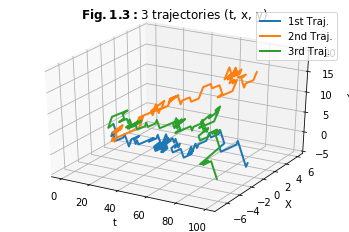

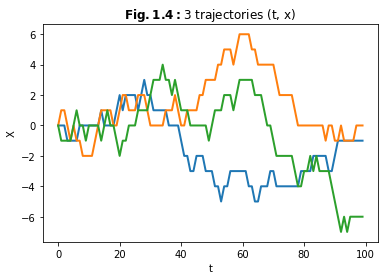

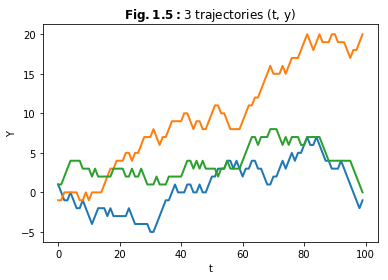

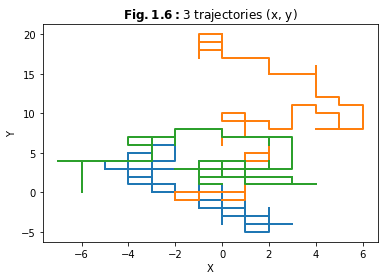

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(z,EndPoint[0,:100],EndPoint[1,:100], lw=2, label="1st Traj.")
ax.plot(z,EndPoint[0,100:200],EndPoint[1,100:200], lw=2, label="2nd Traj.")
ax.plot(z,EndPoint[0,200:300],EndPoint[1,200:300], lw=2, label="3rd Traj.")
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_title(r"$\bf{Fig.1.3:}$"+'3 trajectories (t, x, y)')
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(z,EndPoint[0,:100],lw=2, label="1st Traj.")
ax.plot(z,EndPoint[0,100:200],lw=2, label="2nd Traj.")
ax.plot(z,EndPoint[0,200:300],lw=2, label="3rd Traj.")
ax.set_xlabel('t')
ax.set_ylabel('X')
ax.set_title(r"$\bf{Fig.1.4:}$"+'3 trajectories (t, x)')
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(z,EndPoint[1,:100],lw=2, label="1st Traj.")
ax.plot(z,EndPoint[1,100:200],lw=2, label="2nd Traj.")
ax.plot(z,EndPoint[1,200:300],lw=2, label="3rd Traj.")
ax.set_xlabel('t')
ax.set_ylabel('Y')
ax.set_title(r"$\bf{Fig.1.5:}$"+'3 trajectories (t, y)')
plt.show()

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(EndPoint[0,:100],EndPoint[1,:100],lw=2, label="1st Traj.")
ax.plot(EndPoint[0,100:200],EndPoint[1,100:200],lw=2, label="2nd Traj.")
ax.plot(EndPoint[0,200:300],EndPoint[1,200:300],lw=2, label="3rd Traj.")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(r"$\bf{Fig.1.6:}$"+'3 trajectories (x, y)')
plt.show()

In this Task we can see 3 trajectories of this two-dimensional random walk, on figure $\bf{Fig.1.3:}$ we can see a 3D plot where the x represents time, the y represents the X and the z represents the Y.

As it is difficult to perceive the trajectories I have also plotted Figure $\bf{Fig.1.4:}$ where we can see the t in function of X, the Figure $\bf{Fig.1.5:}$ where we can see the t in function of Y and lastly the Figure $\bf{Fig.1.6:}$ where I have plotted X and Y.

# 2. First passage time and the survival probability #

All particles start at $\bf{R}$=(0,0), and there is an absorbing boundary along the vertical line at $x_c = −30$.

The theoretical predictions are given by:
$$Stheo(t)=erf(\frac{x_c-x_0}{2\sqrt{Dt}}),$$
$$Ftheo(t)=\frac{|x_c-x_0|}{\sqrt{4 \pi D t^3}} \exp{(\frac{-(x_c-x_0)^2}{4Dt})},$$
where x_0 is the initial x of the trajectories so 0, where x_c is the critical x so -30, where D is the diffusion coefficient so 1/4.

In [15]:
N=50000
Tmax=50000
Deltat=10

In [16]:
Fbar = np.zeros(shape=(int(Tmax/10)+1,1))
Sbar = np.ones(shape=(Tmax+1,1))
for traj in range(1,N):
    EndPointX=0
    interval=0
    for t in range(1,Tmax+1):
        A = random.randint(1,4)
        if A==2:
            EndPointX+=1
        elif A==4:
            EndPointX-=1
        if t%10==0:
            interval+=1
        if EndPointX <=-30:
            Fbar[interval]+=1/(N*Deltat)
            Sbar[t:]-=1/N
            break
t=range(Tmax)

In [36]:
Stheo = np.zeros(shape=(Tmax,1))
Ftheo = np.zeros(shape=(Tmax,1))
for t1 in range(1,Tmax):
    Stheo[t1]=erf(-(-30)/(2*np.sqrt(t1/4)))
    Ftheo[t1]=30/(np.sqrt(np.pi*t1**3))*np.exp(-30**2/(t1))

## 2.1-Plot first passage time probability vs time ##

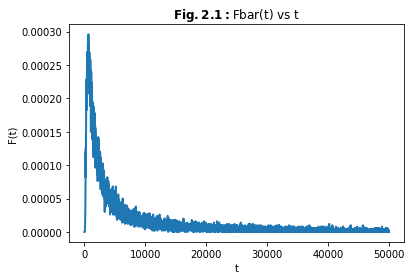

In [37]:
t2=range(10,Tmax,10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t2,Fbar[2:],lw=2)
ax.set_xlabel('t')
ax.set_ylabel('F(t)')
ax.set_title(r"$\bf{Fig.2.1:}$"+'Fbar(t) vs t')
plt.show()

In Figure $\bf{Fig.2.1:}$ we can see the probability to hit the boundary for the first time vs t. As this was calculated with a $\Delta t$ of 10, the x was multiplied by 10 to, instead of plotting by "Fbar" vs $\Delta t$ , to plot "Fbar" vs t.

## 2.2-Compare to probability theoretical vs time ##

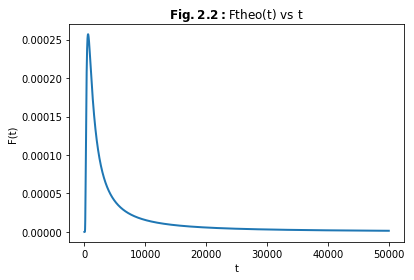

In [42]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t,Ftheo,lw=2)
ax.set_xlabel('t')
ax.set_ylabel('F(t)')
ax.set_title(r"$\bf{Fig.2.2:}$"+'Ftheo(t) vs t')
plt.show()

In Figure $\bf{Fig.2.2}$ we can see the "Ftheo" vs t, as we can see this is very close to the $\bf{Fig.2.1}$, but with less noise, so if we increase the number of particles of the "Fbar" the curves would be even more alike.

## 2.3-Plot first passage time ln(probability) vs ln(t) ##

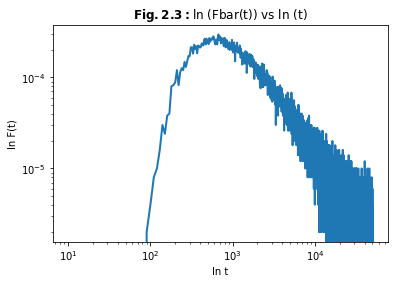

In [40]:
fig = plt.figure()
ax = plt.subplot(111)
ax.loglog(t2,Fbar[2:],lw=2)
ax.set_xlabel('ln t')
ax.set_ylabel('ln F(t)')
ax.set_title(r"$\bf{Fig.2.3:}$"+'ln (Fbar(t)) vs ln (t)')
plt.show()

The ln(Fbar(t)) vs ln(t) can be seen in $\bf{Fig.2.3}$, as the ln (t) increases the same happens for the difference between consecutive values of Fbar, that is the reason for the curve gaining width as the ln(t) increases.

## 2.4-Compare to ln (F theoretical) vs ln(t) ##

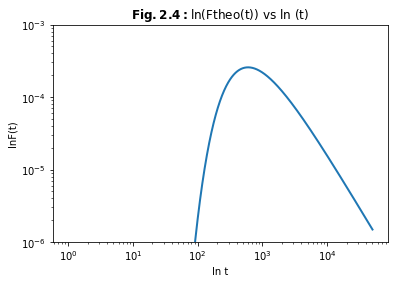

In [41]:
fig = plt.figure()
ax = plt.subplot(111)
ax.loglog(t,Ftheo,lw=2)
ax.set_ylim([10**(-6),10**(-3)])
ax.set_xlabel('ln t')
ax.set_ylabel('lnF(t)')
ax.set_title(r"$\bf{Fig.2.4:}$"+'ln(Ftheo(t)) vs ln (t)')
plt.show()

In $\bf{Fig.2.4}$ we can again see the same but for Ftheo, i.e., the curve of ln (Ftheo(t)) vs ln(t), is has the same behavior as $\bf{Fig.2.3}$, and once more if we increased the number of particles, it would reduce the width of the curve in $\bf{Fig.2.3}$, making the Figures even more alike.

## 2.5-Calculate the survival probability ##

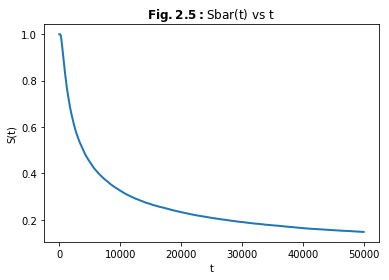

In [26]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t,Sbar[1:],lw=2)
ax.set_xlabel('t')
ax.set_ylabel('S(t)')
ax.set_title(r"$\bf{Fig.2.5:}$"+'Sbar(t) vs t')
plt.show()

The last characteristic obtained through simulation in this section is the survival probability, the Sbar(t) vs t can be seen in $\bf{Fig.2.5}$, as the t increases the number of particles that haven't touched the absorbing boundary decreases.

## 2.6-Compare to theoretical prediction of S ###

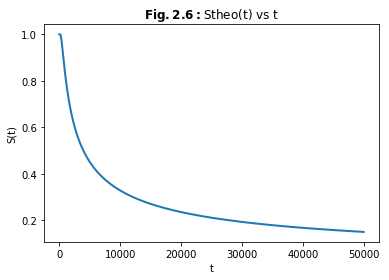

In [27]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(t[1:],Stheo[1:],lw=2)
ax.set_xlabel('t')
ax.set_ylabel('S(t)')
ax.set_title(r"$\bf{Fig.2.6:}$"+'Stheo(t) vs t')
plt.show()

In $\bf{Fig.2.6}$ we can see the Stheo(t) vs t, it is equal to the $\bf{Fig.2.5}$, as it is expected.

# 3. Lévy Flights

## Task 3.1

In [2]:
lmax=100
lmin=1
N=1000

In [4]:
Ylf = np.zeros(shape=(N,3))
Xlf = np.zeros(shape=(N,3))
for muvalue in range(3):
    if muvalue==0:
        mu=1.6
    elif muvalue==1:
        mu=2
    elif muvalue==2:
        mu=2.6
    for jum in range(N-1):
        x=random.uniform(0,1)
        y=random.uniform(0,1)
        
        l=(lmax)/(((lmax**(mu-1)-1)*x+1)**(1/(mu-1)))
        phi=2*np.pi*y
        
        Xlf[jum,muvalue]+=l*np.cos(phi)
        Ylf[jum,muvalue]+=l*np.sin(phi)
        Xlf[jum+1,muvalue]=Xlf[jum,muvalue]
        Ylf[jum+1,muvalue]=Ylf[jum,muvalue]

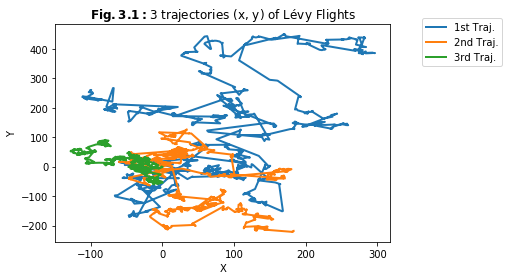

In [5]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Xlf[:,0],Ylf[:,0],lw=2, label="1st Traj.")
ax.plot(Xlf[:,1],Ylf[:,1],lw=2, label="2nd Traj.")
ax.plot(Xlf[:,2],Ylf[:,2],lw=2, label="3rd Traj.")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(bbox_to_anchor=(1.35, 1.05))
ax.set_title(r"$\bf{Fig.3.1:}$"+'3 trajectories (x, y) of Lévy Flights')
plt.show()

In $\bf{Fig.3.1}$ we can see the three trajectories of Lévy flight, the first in blue with the $\mu$ equal to 1.6, the second in orange with $\mu$=2 and the third at green with $\mu$ equal to 2.6.

The blue trajectory is the one that covered more space, and the green the one that covered less space.

In [9]:
Yrw = np.zeros(shape=(N,3))
Xrw = np.zeros(shape=(N,3))
for trajvalue in range(0,3):
    A = [random.randint(1,4) for x in range(N)]
    for jump in range(N-1):
        if A[jump]==1:
            Xrw[jump,trajvalue]+=1
        elif A[jump]==2:
            Yrw[jump,trajvalue]+=1
        elif A[jump]==3:
            Xrw[jump,trajvalue]-=1
        elif A[jump]==4:
            Yrw[jump,trajvalue]-=1
        Xrw[jump+1,trajvalue]=Xrw[jump,trajvalue]
        Yrw[jump+1,trajvalue]=Yrw[jump,trajvalue]

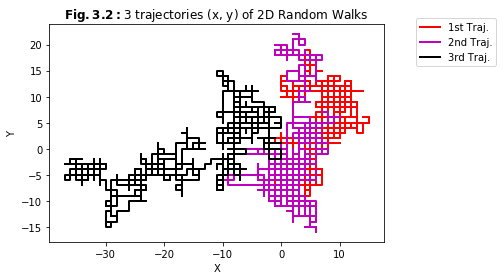

In [14]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(Xrw[:,0],Yrw[:,0],'r',lw=2, label="1st Traj.")
ax.plot(Xrw[:,1],Yrw[:,1],'m',lw=2, label="2nd Traj.")
ax.plot(Xrw[:,2],Yrw[:,2],'k',lw=2, label="3rd Traj.")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(bbox_to_anchor=(1.35, 1.05))
ax.set_title(r"$\bf{Fig.3.2:}$"+'3 trajectories (x, y) of 2D Random Walks')
plt.show()

In $\bf{Fig.3.2}$ we can see again another 2D random walk, where all the jumps are of length 1, and the number of jumps is equal to N so 1000 jumps.

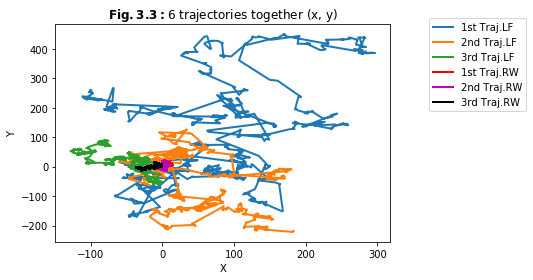

In [15]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(Xlf[:,0],Ylf[:,0],lw=2, label="1st Traj.LF")
ax.plot(Xlf[:,1],Ylf[:,1],lw=2, label="2nd Traj.LF")
ax.plot(Xlf[:,2],Ylf[:,2],lw=2, label="3rd Traj.LF")

ax.plot(Xrw[:,0],Yrw[:,0],'r',lw=2, label="1st Traj.RW")
ax.plot(Xrw[:,1],Yrw[:,1],'m',lw=2, label="2nd Traj.RW")
ax.plot(Xrw[:,2],Yrw[:,2],'k',lw=2, label="3rd Traj.RW")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title(r"$\bf{Fig.3.3:}$"+'6 trajectories together (x, y)')
plt.show()

In this $\bf{Fig.3.3}$ all the 6 trajectories are together, as we can see the random walks with the same number of jumps spread less than the Lèvy flights trajectories. This is expected since the random walk always does the $l_{min}$ distance jumps.

## Task 3.2

### Analytical Proof

Prove that if x is a number generated uniformly at random in the interval $[0,1]$, then:

$$l=\frac{l_{max}}{[(l_{max}^{\mu-1}-1)x+1]^{\frac{1}{\mu-1}}},$$

will produce random numbers according to the Lévy flight distribution:

$$P(l)=\frac{c}{l^\mu},$$
where c is given by:
$$c=\frac{\mu-1}{1-l^{1-\mu}}$$

With this $P(l)dl=dx \to \frac{dx}{dl}=P(l)$, in the caso of the Lévy Flights we know that:

$$\frac{dx}{dl}=\frac{c}{l^\mu}.$$

The solution to this equation is:

$$x=\frac{c l ^{1-\mu}}{1-\mu}+A.$$

So it becomes:

$$l=[(1-\mu)(x-A)]^{\frac{1}{1-\mu}}$$

To find the A, we impose the conditions $l(0)=l_{max}$ and $l(x=1)=1$, so we obtain:

$$l=\frac{l_{max}}{[(l_{max}^{\mu-1}-1)x+1]^{\frac{1}{\mu-1}}},$$

Behaves like:

$$P(l)=\frac{l < \# \text{ of l(x) }\le (l+\Delta l) }{N\Delta l}$$

In the limit where $N \to \infty$ and $\Delta l \to 0$  we have:

$$ P(l)= \int^1_0 dx \delta(l-l(x)) = \frac{1}{|\frac{dl}{dx}|_{l=l(x)}}=\frac{c}{l^\mu}$$

So the random numbers l(x) are distributed according to the Lévy distribution.

### Numeric example

In the following code I give a example that the random numbers l(x) are distributed according to the Lévy distribution, for a $\mu$ value of 2, and with a N equal to 500000.

In [124]:
mu=2
N=500000
lmax=100
deltat=1
lx = np.zeros(shape=(N,1))
Pl = np.zeros(shape=(int(lmax/deltat)+1,1))

for jum in range(N):
    x=random.uniform(0,1)
    l=(lmax)/(((lmax**(mu-1)-1)*x+1)**(1/(mu-1)))
    lx[jum,0]=l

for x in range(N):
    a=int(np.ceil(lx[x,0]/deltat))
    Pl[a,0]+=1/(N)

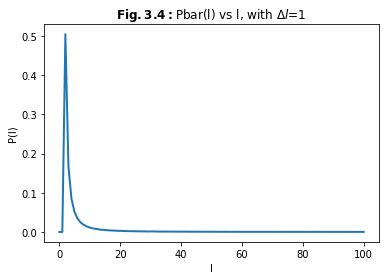

In [126]:
lplot=range(0,lmax+1,deltat)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(lplot,Pl,lw=2)
ax.set_xlabel('l')
ax.set_ylabel('P(l)')
ax.set_title(r"$\bf{Fig.3.4:}$"+'Pbar(l) vs l, with $\Delta l$=1')
plt.show()

In the $\bf{Fig.3.4}$ we can see the Lévy flights distribution vs l, this was made with a value of $\Delta l = 1$, but we know that this formula only becomes true for $N \to \infty$ and $\Delta l \to 0$, even though the conditions above are enough for this value of $\mu$.

In [116]:
Ptheo = np.zeros(shape=(100,1))
for l in range (2,100):
    Ptheo[l]=((mu-1)/(1-l**(1-mu)))/(l**mu)

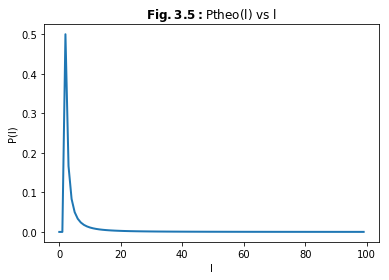

In [119]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range(0,100),Ptheo,lw=2)
ax.set_xlabel('l')
ax.set_ylabel('P(l)')
ax.set_title(r"$\bf{Fig.3.5:}$"+'Ptheo(l) vs l')
plt.show()

Like I just written this conditions of $\Delta l$ and $N$ are enough, the curves are completely identical, as it can be seen when comparing the $\bf{Fig.3.5}$ and the $\bf{Fig.3.4}$.

This as it is a example don't proves the that the random numbers are distributed as we want, only shows that for one case is true.